In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("/Users/Nika/Downloads/SIS_Faculty-List.csv",encoding ="Latin")

In [3]:
df[df.duplicated()]

,ID,Name,Location,Grade,Title,Join\nDate,LWD,Type,Divison,Reports To,Highest\nQualification\nLevel,Highest Qualification,Major,University,All Qualifications from Profile,Courses Taught- Term 201510,MAJOR TEACHING FIELD,DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications,Criteria


<Axes: >

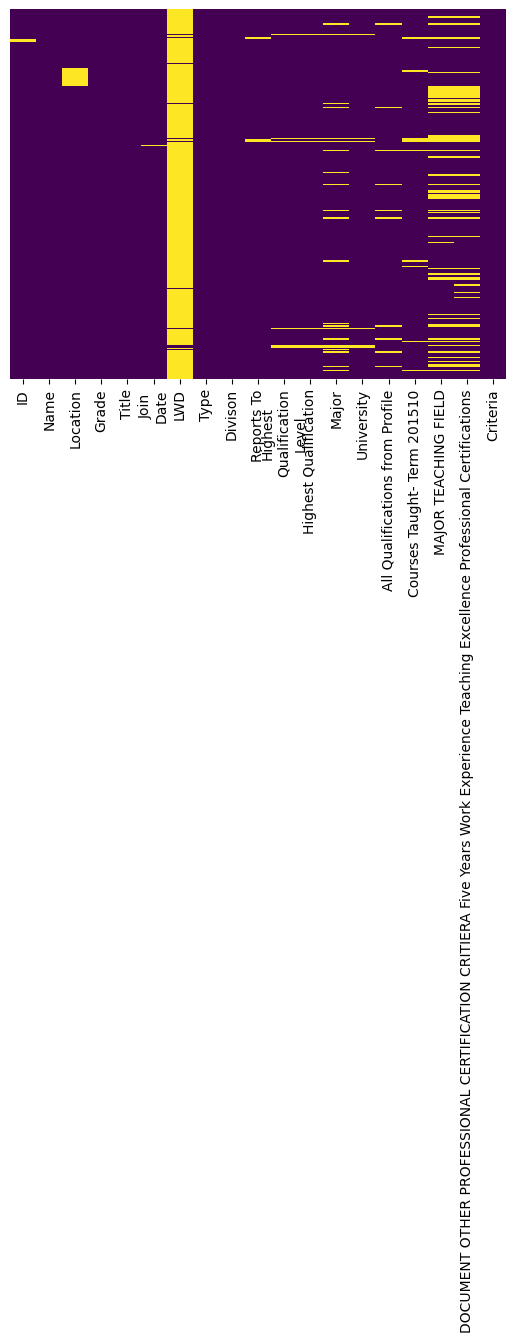

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [5]:
print(df[df["LWD"].notnull()])

            ID               Name    Location Grade  \
19   LT9280999    Ludmilla Sirnov   Liverpool    FA   
21   LT9002264         Vish Singh   Liverpool    FA   
41   LT9001556         Max Rogers  Manchester    FA   
72   LT9304807    Charlote Garrod     Bristol    FA   
99   LT9308826      Jackie Turner     Bristol    FA   
101  LT9303893          James Orr     Bristol    FA   
214  LT9001277    Kimber Upshaw        Oxford    FA   
245  LT9301614     Lizzie Gomez     Leicester    FA   
258  LT9280275   Aretha Platter     Cambridge    FA   
259  LT9001889    Concha Britto     Cambridge    FA   
261  LT9282786  Christin Lytton     Cambridge    FA   

                          Title Join\nDate        LWD       Type   Divison  \
19   Adjunct Faculty - Business  23-Aug-15  22-Dec-15  Full Time  Business   
21   Adjunct Faculty - Business  23-Aug-15  22-Dec-15  Full Time  Business   
41           Faculty - Business  25-Aug-98  17-Dec-15  Full Time  Business   
72   Adjunct Faculty - Busi

In [104]:
print(df.columns)

Index(['ID', 'Name', 'Location', 'Grade', 'Title', 'Join\nDate', 'LWD', 'Type',
       'Divison', 'Reports To', 'Highest\nQualification\nLevel',
       'Highest Qualification', 'Major', 'University',
       'All Qualifications from Profile', 'Courses Taught- Term 201510',
       'MAJOR TEACHING FIELD',
       'DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications',
       'Criteria'],
      dtype='object')


In [6]:
total_rows = df.shape[0]  # Or you can use len(df)

print(f'Total data points in the file: {total_rows}')

Total data points in the file: 284


In [105]:
# LWD is fiiled with future date for tagging unknown data
df["LWD"] = df["LWD"].fillna("20-Oct-2100")

In [106]:
df.isnull().sum()

ID                                                                                                                                2
Name                                                                                                                              0
Location                                                                                                                         14
Grade                                                                                                                             0
Title                                                                                                                             0
Join\nDate                                                                                                                        1
LWD                                                                                                                               0
Type                                                                        

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 19 columns):
 #   Column                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                         --------------  ----- 
 0   ID                                                                                                                             282 non-null    object
 1   Name                                                                                                                           284 non-null    object
 2   Location                                                                                                                       270 non-null    object
 3   Grade                                                                                                              

In [108]:
uni_list = df[df["Location"].isnull()]["University"]

uni_locations = df[df["University"].isin(uni_list)]

print(uni_locations[["University", "Location"]])

                                         University   Location
14                           The University of Hull  Liverpool
45                        University of Westminster        NaN
46                       University Of Johannesburg        NaN
47                            University of Toronto        NaN
48                           The University of Hull        NaN
49                   Michigan State University, USA        NaN
50                       University of Nebraska,USA        NaN
51               Girne American University, Cyprus         NaN
52                 National University of Singapore        NaN
53                Nova Southeastern University, USA        NaN
54       International Islamic University< Malaysia        NaN
55                     University of Salento, Italy        NaN
56                  PaulCezannel University, France        NaN
57   University of Paris 1 Pantheon-Sorbonne France        NaN
58                   Colorada State University, USA    

In [109]:
# Assign Universities with Location
university_to_location = {
    "University of Westminster": "Westminster",
    "University Of Johannesburg": "Johannesburg",
    "University of Toronto": "Toronto",
    "The University of Hull": "Liverpool",
    "Michigan State University, USA": "Michigan",
    "University of Nebraska,USA": "Cardiff",
    "Girne American University, Cyprus": "Girne",
    "National University of Singapore": "Singapore",
    "Nova Southeastern University, USA": "Fort Lauderdale",
    "International Islamic University  Malaysia": "Malaysia",
    "University of Salento, Italy": "Salento",
    "PaulCezannel University, France": "Aix-en-Provence",
    "University of Paris 1 Pantheon-Sorbonne France": "Paris",
    "Colorada State University, USA": "Colorada",
    "International Islamic University< Malaysia": "Malaysia"
}




In [110]:
#Apply locations to empty location columns in which University is avaulable
df["Location"] = df.apply(lambda row: university_to_location.get(row["University"], row["Location"]), axis=1)


In [112]:
df.isnull().sum()

ID                                                                                                                                2
Name                                                                                                                              0
Location                                                                                                                          1
Grade                                                                                                                             0
Title                                                                                                                             0
Join\nDate                                                                                                                        1
LWD                                                                                                                               0
Type                                                                        

In [113]:
df["ID"] = df["ID"].fillna(lambda x: np.random.randit(1,1000))

#fILL Missing values with random numbers


In [114]:
df.isnull().sum()

ID                                                                                                                                0
Name                                                                                                                              0
Location                                                                                                                          1
Grade                                                                                                                             0
Title                                                                                                                             0
Join\nDate                                                                                                                        1
LWD                                                                                                                               0
Type                                                                        

In [20]:
df[["Courses Taught- Term 201510","University"]]

,Courses Taught- Term 201510,University
0,BUS2403 - Innovation & Entrepreneurship\nBUS20...,American University of Beirut
1,BUS4173 - Managerial Accounting II\nBUS4916 - ...,University of Northumbria
2,BUS3903 - Contemporary Business\nBUS1303 - Mar...,Griffith University
3,"HRM, Organizational behaviour, Strategic Mgt, ...","The University of Swansea, UK"
4,"Micro and Macroeconomics, Statistics,Introduct...","New York University, USA"
5,BUS3103 - Internat Busi Globalisation\nBUS1303...,Swiss Management Center
6,BUS2403 - Innovation & Entrepreneurship\nBUS23...,University of Ottawa
7,BUS4956 - Integrative Industry Project\nBUS390...,Lyceum Of The Philippines
8,BUS3103 - Internat Busi Globalisation\nBUS2203...,The University of Newcastle
9,BUS4956 - Integrative Industry Project,University College London


In [21]:
df[df["Location"] == "Cambridge"][["University"]]


,University
250,University of Santo Tomas
251,University of Western Ontario
252,American University of Beirut
253,Universitat Autònoma de Barcelona
254,Alexandria University
255,Dubai Women's College
256,The Univ. of Western Australia
257,University of Huddersfield
258,NaN
259,NaN


In [116]:
df[df["University"].isnull()][["Courses Taught- Term 201510","University"]]

,Courses Taught- Term 201510,University
19,BUS3903 - Contemporary Business\nBUS1403 - Bus...,NaN
99,NaN,NaN
101,NaN,NaN
245,BSD2033 - Basic Accounting,NaN
258,BUS1503 - Accounting for Managers,NaN
259,BUS1203 - Software Apps for Business,NaN


In [117]:
df.loc[df["Name"] == "Ludmilla Sirnov", ["Highest\nQualification\nLevel", "Highest Qualification", "Major","University"]] = df.loc[df["Name"] == "Ludmilla Sirnov", ["Highest\nQualification\nLevel", "Highest Qualification", "Major","University"]].fillna({"Highest\nQualification\nLevel": "Masters", "Highest Qualification": "Masters", "Major": "Business Management","University":"Swiss Management Center"})


In [118]:
df["Join\nDate"] = df["Join\nDate"].fillna("20.05.2050") # Future Value for tagging as unknown data

In [119]:
df["Reports To"] = df["Reports To"].fillna(df["Reports To"].mode()[0])  # Most frequent value

In [120]:
df["Major"] = df["Major"].fillna(df["Major"].mode()[0])  # Most frequent value

In [121]:
df["MAJOR TEACHING FIELD"] = df["MAJOR TEACHING FIELD"].fillna(df["MAJOR TEACHING FIELD"].mode()[0])  # Most frequent value

In [122]:
df["DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications"] = df["DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications"].fillna(df["DOCUMENT OTHER PROFESSIONAL CERTIFICATION CRITIERA Five Years Work Experience Teaching Excellence Professional Certifications"].mode()[0])  # Most frequent value

In [123]:
df["All Qualifications from Profile"] = df["All Qualifications from Profile"].fillna(df["All Qualifications from Profile"].mode()[0])  # Most frequent value

In [124]:
df["Highest\nQualification\nLevel"] = df["Highest\nQualification\nLevel"].fillna(df["Highest\nQualification\nLevel"].mode()[0])  # Most frequent value

In [125]:
df["Courses Taught- Term 201510"] = df["Courses Taught- Term 201510"].fillna(df["Courses Taught- Term 201510"].mode()[0])  # Most frequent value

In [126]:
df["University"] = df["University"].fillna(df["University"].mode()[0])  # Most frequent value

In [127]:
df["Location"] = df["Location"].fillna(df["Location"].mode()[0])  # Most frequent value

In [129]:
df["Highest Qualification"] = df["Highest Qualification"].fillna(df["Highest Qualification"].mode()[0])

In [130]:
df.isnull().sum()

ID                                                                                                                               0
Name                                                                                                                             0
Location                                                                                                                         0
Grade                                                                                                                            0
Title                                                                                                                            0
Join\nDate                                                                                                                       0
LWD                                                                                                                              0
Type                                                                               